## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
df=pd.read_csv('RegData.csv',names=['x1','y1'])
df.insert(0,'x0',1)
df.head()


,x0,x1,y1
0,1,2.9,4.0
1,1,6.7,7.4
2,1,4.9,5.0
3,1,7.9,7.2
4,1,9.8,7.9


#### Plot the original data (scatter plot of X,y)

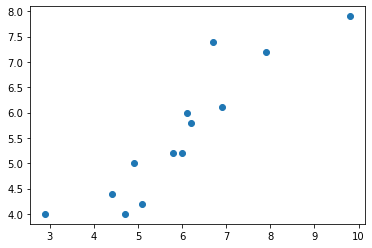

In [3]:
plt.scatter(df.x1,df.y1)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

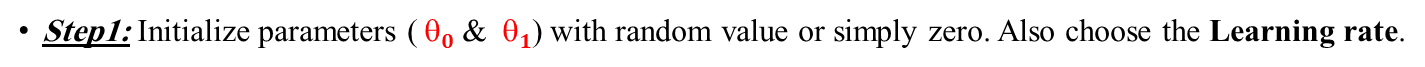

In [4]:
theta=np.matrix([0,0])
theta

matrix([[0, 0]])

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.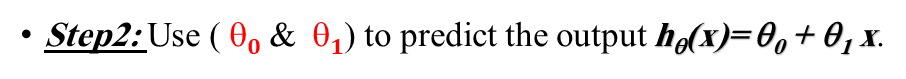
#### Note: you will need to iterate through all data points

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).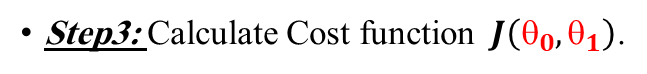
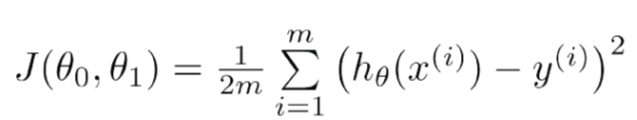

In [5]:

def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse


### Step4: Calculate the gradient.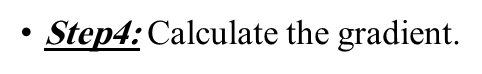
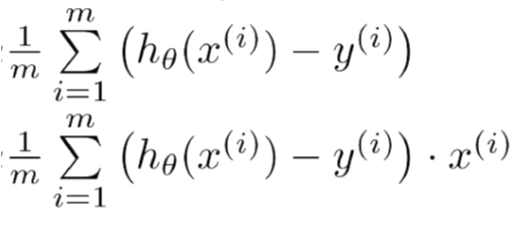

### Step5: Update the parameters (simultaneously).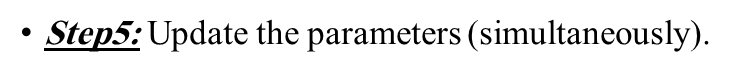
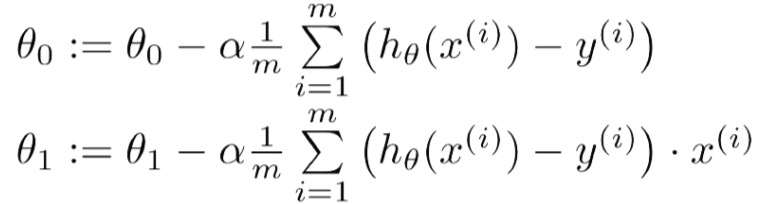

In [6]:
col=df.shape[1]
x=df.iloc[:,0:col-1]
y=df.iloc[:,col-1:col]
x=np.matrix(x)
y=np.matrix(y)

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.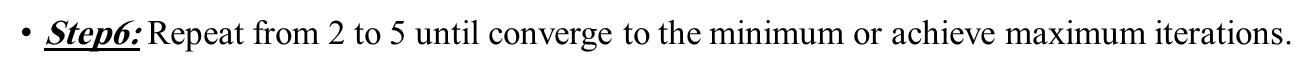

In [7]:
alpha=0.01
itera=100

In [26]:
def gradient_decent(X,Y,Theta,LearnRate,iteration):  #theta_new= theta_old - (alpha * 1/m *(summation(h(xi) - y ) *xi)
    
    temp = np.matrix(np.zeros(Theta.shape))
    cost = np.zeros(iteration)                       # save the value of cost for each iterative
    theta_parameters=int(Theta.ravel().shape[1])     # to get numper of thetas with code not manually
    tt0=[]
    tt1=[]
    h=[]
    for i in range(iteration):
        Theta=temp 
        h.append(X*Theta.T)
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        cost[i] = GDCostFunction(X,Y,Theta) 
        
        for j in range(theta_parameters):
            t= np.multiply(error,X[:,j]) # (summation(h(xi) - y ) *xi
            temp[:,j] = Theta[:,j] - (LearnRate/len(x)) * np.sum(t)
       
    

        
       
    
    return Theta , cost,tt0,tt1,h

In [27]:
th_op , cost , tt0, tt1,h =gradient_decent(x,y,theta,alpha,itera)

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [28]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

Text(0, 0.5, 'y1- data')

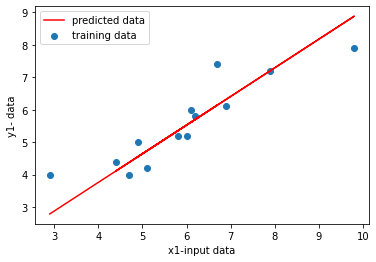

In [29]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y1 , label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

Text(0, 0.5, 'Cost Value')

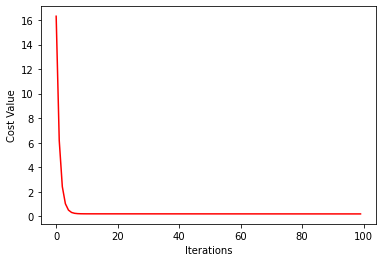

In [30]:
fig,ax = plt.subplots()
ax.plot(np.arange(itera), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

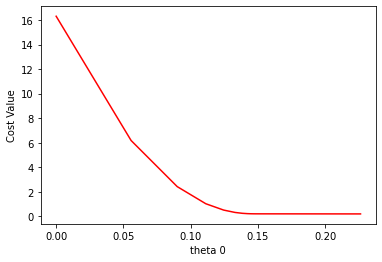

In [31]:
fig,ax = plt.subplots()
ax.plot(tt0, cost ,'r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

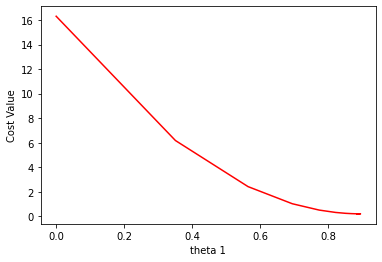

In [32]:
fig,ax = plt.subplots()
ax.plot(tt1, cost ,'r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost Value')

In [33]:
 r2_score(df.y1, y_hat)


0.7563025293243409

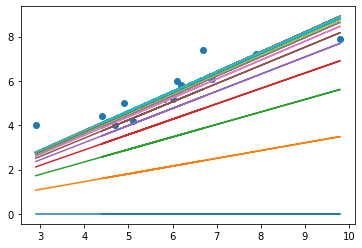

In [34]:
plt.scatter(df.x1,df.y1)
for i in  h:
    plt.plot(df.x1,i)

#### Use R2 score to evaluate LR equation output
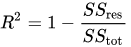
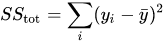
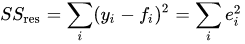
https://en.wikipedia.org/wiki/Coefficient_of_determination

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [35]:
dfm=pd.read_csv('MultipleLR.csv',names=['x1','x2','x3','y'])
dfm.head()

,x1,x2,x3,y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [36]:
dfm.insert(0,'x0',1)


In [37]:
dfm.head()

,x0,x1,x2,x3,y
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142


In [38]:
col=dfm.shape[1]
x=np.matrix(dfm.iloc[:,0:col-1])
y=np.matrix(dfm.iloc[:,col-1:col])

In [39]:
theta=np.matrix(np.zeros(x.shape[1]))

In [40]:
theta

matrix([[0., 0., 0., 0.]])

In [41]:
alpha=0.0001
itera=100
theta.shape

(1, 4)

### Repeat your implementation but for more than one variable

In [42]:
def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse


def cost_function(X,Y,Theta):            # 1/2m * (summation(h(xi) - y )^2 )
    
    error= np.power(((X*Theta.T) -Y) ,2) #(y_predict - y_target)^2
    
    mse=np.sum(error)/(2*len(X))         # get mean square error 
    return mse

def gradient_decent_multi(X,Y,theta,alpha,iteration):     #theta_new= theta_old - (alpha * 1/m *(summation(h(xi) - y ) *xi)
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iteration)
    thetas = int(theta.ravel().shape[1])   # to get numper of thetas with code not manually
    theta_0= []
    theta_1= []
    theta_2= []
    theta_3= []
    h=[]
    for i in range(iteration):
        error = (X * theta.T)- Y
        cost[i] = GDCostFunction(X,Y,theta)

        for j in range(thetas):
            term = np.multiply(error , X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
        
        theta = temp
        h.append(X*theta.T)
        theta_0.append(theta[0,0])
        theta_1.append(theta[0,1])
        theta_2.append(theta[0,2])  
        theta_3.append(theta[0,3])  

    return theta , cost ,theta_0 , theta_1 , theta_2 , theta_3,h



#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [43]:
th,cost,tt0,tt1,tt2,tt3, h=gradient_decent_multi(x,y,theta,alpha,itera)

### Plot loss vs. iterations

In [44]:
th

matrix([[0.00789687, 0.61841652, 0.6192408 , 0.7523814 ]])

Text(0, 0.5, 'Cost Value')

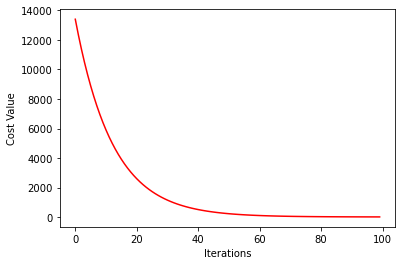

In [45]:
fig,ax = plt.subplots()
ax.plot(np.arange(itera), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

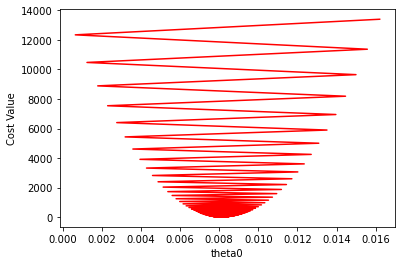

In [46]:
fig,ax = plt.subplots()
ax.plot(tt0, cost ,'r')

ax.set_xlabel('theta0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

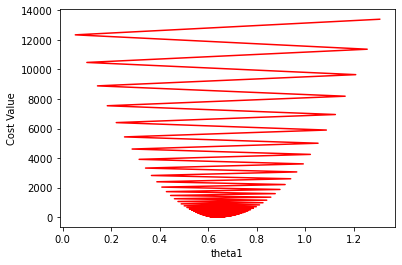

In [47]:
fig,ax = plt.subplots()
ax.plot(tt1, cost ,'r')

ax.set_xlabel('theta1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

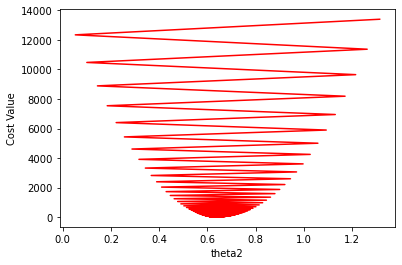

In [48]:
fig,ax = plt.subplots()
ax.plot(tt2, cost ,'r')

ax.set_xlabel('theta2')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

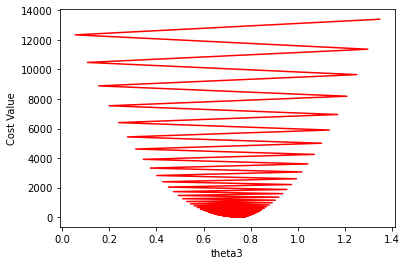

In [49]:
fig,ax = plt.subplots()
ax.plot(tt3, cost ,'r')

ax.set_xlabel('theta3')
ax.set_ylabel('Cost Value')

In [50]:
y_hat=x*th.T

In [51]:
y_hat

matrix([[151.12017181],
        [181.98529377],
        [179.11220591],
        [195.29962115],
        [138.68889358],
        [102.65002619],
        [146.43582373],
        [108.89384211],
        [170.44448325],
        [158.41922109],
        [140.94933492],
        [139.22392883],
        [184.81521659],
        [153.32590811],
        [147.18738084],
        [184.86167878],
        [145.84938059],
        [175.80277717],
        [176.1035046 ],
        [157.5747396 ],
        [171.68708628],
        [170.93140774],
        [163.5937908 ],
        [151.82361817],
        [188.44151014]])

# Use R2 score to evaluate LR equation output

In [52]:
r2_score(dfm.y , y_hat)

C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.9690624236630153